In [ ]:
import numpy as np
from numpy.random import randn, randint, seed
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
def plot_decision_boundary(
    estimator,
        X,
        *,
        grid_resolution=100,
        eps=1.0,
        plot_method="contourf",
        xlabel=None,
        ylabel=None,
        ax=None,
        **kwargs,
    ):
    x0, x1 = X[:,0],X[:,1]

    x0_min, x0_max = x0.min() - eps, x0.max() + eps
    x1_min, x1_max = x1.min() - eps, x1.max() + eps

    xx0, xx1 = np.meshgrid(
        np.linspace(x0_min, x0_max, grid_resolution),
        np.linspace(x1_min, x1_max, grid_resolution),
    )

    X_grid = np.c_[xx0.ravel(), xx1.ravel()]

    response = estimator.forward(X_grid)

    display = DecisionBoundaryDisplay(
        xx0=xx0,
        xx1=xx1,
        response=response.reshape(xx0.shape),
        xlabel="",
        ylabel="",
    )
    return display.plot(ax=ax, plot_method=plot_method, **kwargs)

In [ ]:
N, D_in, H, D_out = 64, 2, 100, 1
loss = 0.8005 # Used to initialize plots correctly, will be different with different seed
def get_weights():
    seed(0)
    w1, w2 = randn(D_in, H), randn(H, D_out)
    return w1, w2

def get_label(x):
    rand = randn(1, 1)
    if rand < -1:
        return 0
    if x[0] > 0.5 or x[1] < -1:
        return 1
    return 0

def get_labels(xs):
    ys = []
    for x in xs:
        ys.append(get_label(x))
    return np.array(ys).reshape(N, 1)

def get_dataset(N=64, D_in=2):
    seed(0)
    x = randn(N, D_in)
    y = get_labels(x)
    return x, y

def visualize_dataset(x, y, title="Visualization of dataset"):
    scatter = plt.scatter(x[:,0], x[:,1], c=y)
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
    plt.figure(figsize=(14, 10))
    plt.savefig("fig.png")
    plt.show()

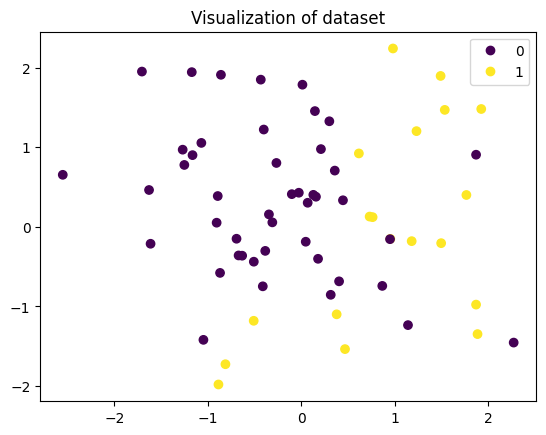

<Figure size 1400x1000 with 0 Axes>

In [ ]:
x, y = get_dataset()
visualize_dataset(x, y)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy(preds, labels):
    return -np.mean(labels * np.log(preds) + (1 - labels) * np.log(1 - preds))

In [ ]:
class Classifier():
    def __init__(self):
        self.w1, self.w2 = get_weights()

    def forward(self, x):
        self.x = x
        z1 = self.x @ self.w1
        self.h = sigmoid(z1)
        z2 = self.h @ self.w2
        y_pred = sigmoid(z2)
        return y_pred

    def backward(self, y_pred, y):
        grad_y_pred = -(np.divide(y, y_pred) - np.divide(1-y, 1-y_pred))
        grad_w2 = self.h.T @ (y_pred * (1-y_pred) * grad_y_pred)
        grad_h = self.w2.T * (y_pred * (1-y_pred) * grad_y_pred)
        grad_w1 =  self.x.T @ (self.h * (1-self.h) * grad_h)

        # Update parameters
        self.w1 -= 1e-4 * grad_w1
        self.w2 -= 1e-4 * grad_w2

In [ ]:
# Create model (calls __init__ to set random weights)
clf = Classifier()

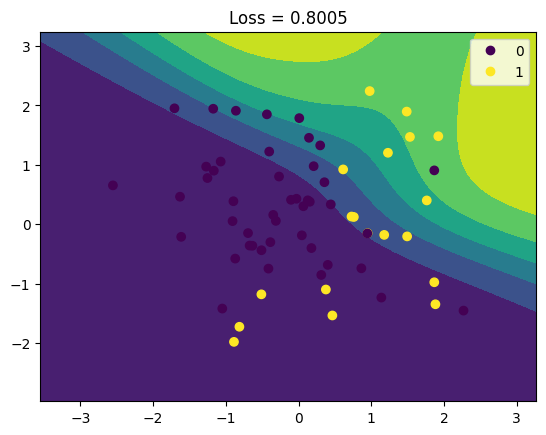

<Figure size 1400x1000 with 0 Axes>

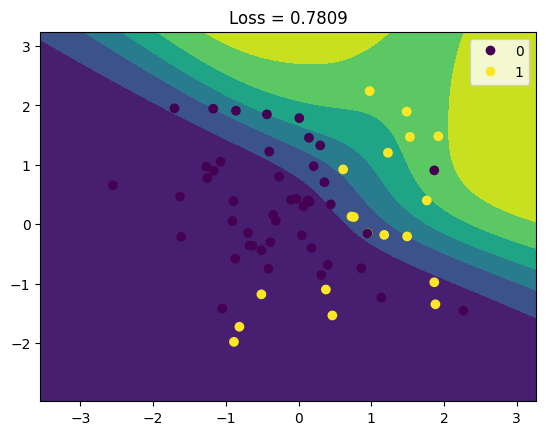

<Figure size 1400x1000 with 0 Axes>

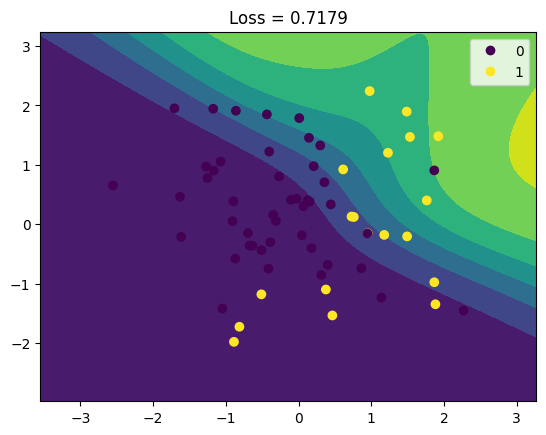

<Figure size 1400x1000 with 0 Axes>

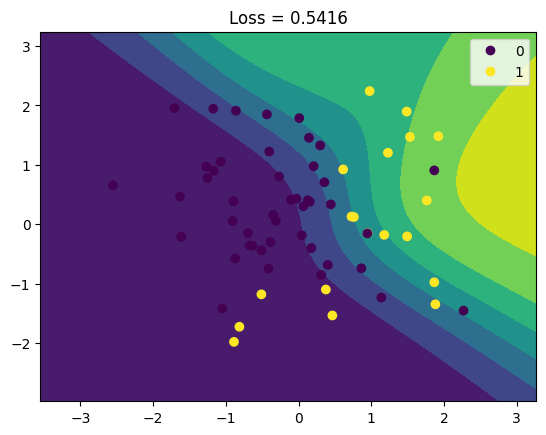

<Figure size 1400x1000 with 0 Axes>

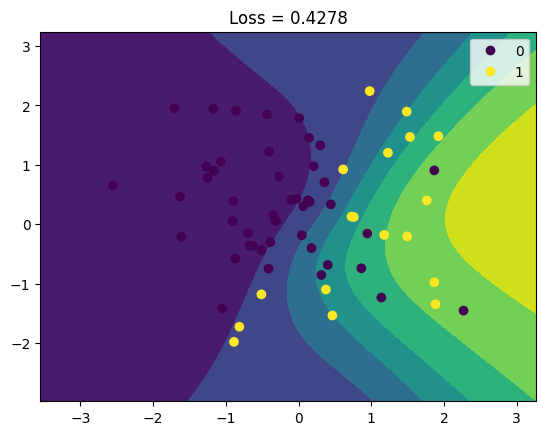

<Figure size 1400x1000 with 0 Axes>

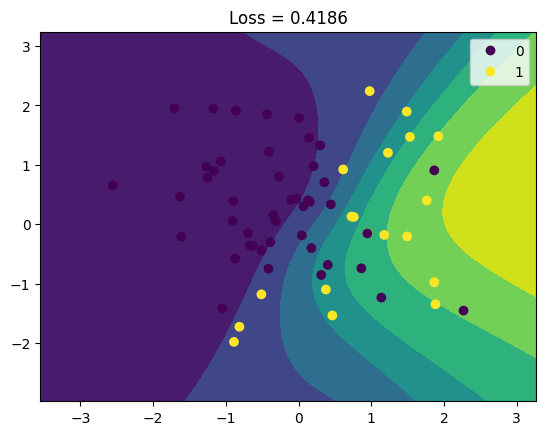

<Figure size 1400x1000 with 0 Axes>

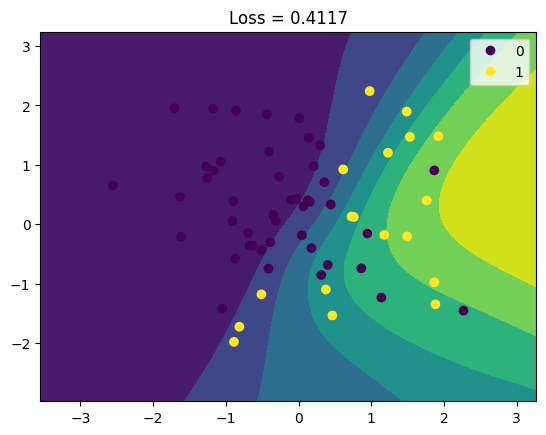

<Figure size 1400x1000 with 0 Axes>

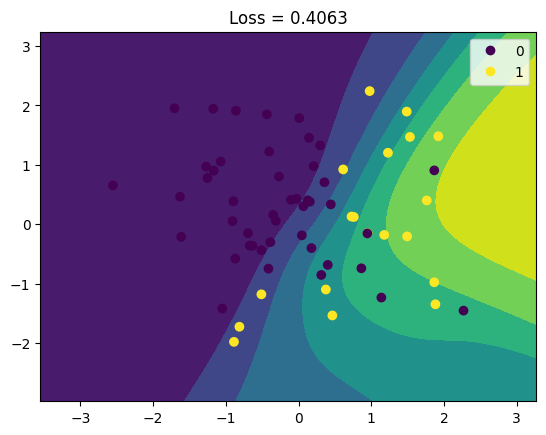

<Figure size 1400x1000 with 0 Axes>

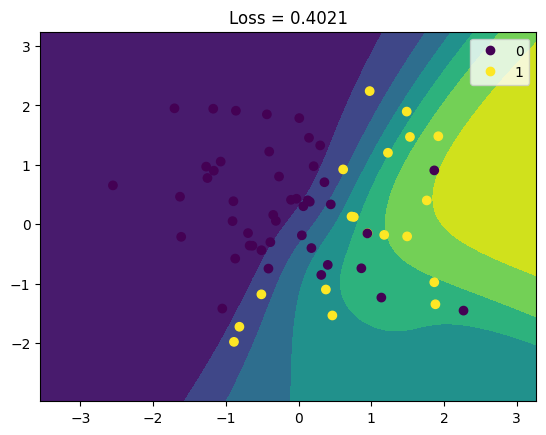

<Figure size 1400x1000 with 0 Axes>

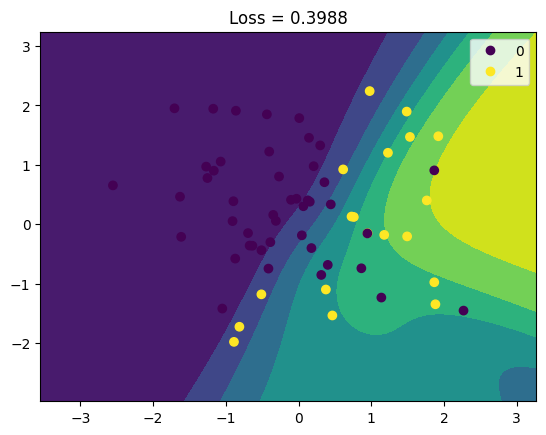

<Figure size 1400x1000 with 0 Axes>

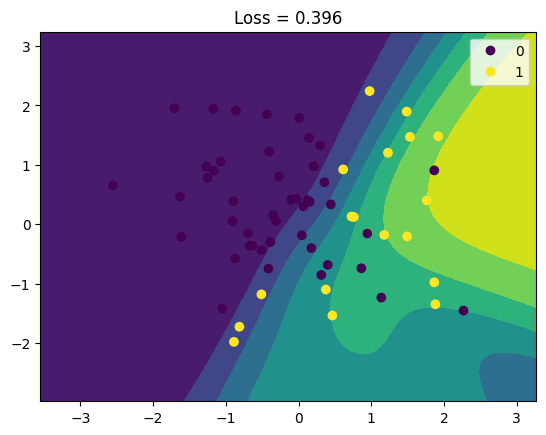

<Figure size 1400x1000 with 0 Axes>

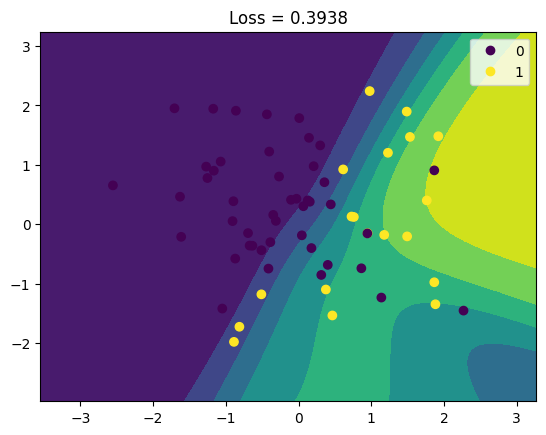

<Figure size 1400x1000 with 0 Axes>

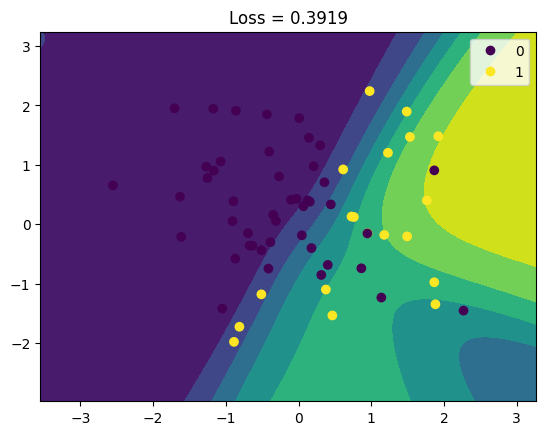

<Figure size 1400x1000 with 0 Axes>

In [ ]:
for t in range(10000):

    # Visualize classifier
    if t == 5 or t == 20 or t== 100 or t % 1000 == 0:
        plot = plot_decision_boundary(clf, x)
        visualize_dataset(x, y, title="Loss = {}".format(round(loss, 4)))

    # Predict on data (forward)
    y_pred = clf.forward(x)

    # Backpropogate errors
    clf.backward(y_pred, y)

    # Calculate loss for next plot
    loss = cross_entropy(y_pred, y)